In [1]:
import requests
import json
import os
from dotenv import load_dotenv
from pathlib import Path


load_dotenv('logstuff.env')


username = os.environ.get('user')
password = os.environ.get('password')

app_id = os.environ.get('app_id')
secret = os.environ.get('secret')
useragent = 'pyDaddy/0.0.1'

auth = requests.auth.HTTPBasicAuth(app_id, secret)

print(auth)

# here we pass our login method (password), username, and password
data = {'grant_type': 'password',
        'username': username,
        'password': password}

# setup our header info, which gives reddit a brief description of our app
headers = {'User-Agent': useragent}

# send our request for an OAuth token
authresponse = requests.post('https://www.reddit.com/api/v1/access_token',
                    auth=auth, data=data, headers=headers)

# convert response to JSON and pull access_token value
TOKEN = authresponse.json()['access_token']

# add authorization to our headers dictionary
headers = {**headers, **{'Authorization': f"bearer {TOKEN}"}}

# while the token is valid (~2 hours) we just add headers=headers to our requests
requests.get('https://oauth.reddit.com/api/v1/me', headers=headers)

print(authresponse)

<Response [200]>


In [2]:
authresponse.json()

{'access_token': '22158216-2YvFzUFdqTu5-7TEv2Qh7im1vUfozg',
 'token_type': 'bearer',
 'expires_in': 3600,
 'scope': '*'}

In [3]:
response = requests.get("https://oauth.reddit.com/r/politics/hot",
                   headers=headers)

print(response)
print(response.json())  # let's see what we get


<Response [200]>
{'kind': 'Listing', 'data': {'after': 't3_tms7j0', 'dist': 26, 'modhash': None, 'geo_filter': None, 'children': [{'kind': 't3', 'data': {'approved_at_utc': None, 'subreddit': 'politics', 'selftext': 'President Biden is expected to speak at 1:30 PM Eastern at a news conference at NATO’s headquarters following an extraordinary meeting of NATO leaders to discuss responses to the Russian invasion of Ukraine.\n\n[Watch Here](https://www.nato.int/cps/en/natohq/events_67375.htm)', 'author_fullname': 't2_onl9u', 'saved': False, 'mod_reason_title': None, 'gilded': 0, 'clicked': False, 'title': 'Discussion Thread: President Biden news conference at NATO HQ', 'link_flair_richtext': [{'e': 'text', 't': 'Discussion'}], 'subreddit_name_prefixed': 'r/politics', 'hidden': False, 'pwls': 6, 'link_flair_css_class': 'discussion', 'downs': 0, 'thumbnail_height': None, 'top_awarded_type': None, 'hide_score': False, 'name': 't3_tmq17g', 'quarantine': False, 'link_flair_text_color': 'dark', 

In [4]:
count = 0

for post in response.json()['data']['children']:
    print(post['data']['title'])
    print('\n')
    count += 1
    
    
print(count)

Discussion Thread: President Biden news conference at NATO HQ


Marjorie Taylor Greene branded ‘insurrectionist’ in lawsuit trying to stop her running for reelection


Marjorie Taylor Greene Unfit for Office, Suit Claims, Citing Jan. 6 Support


Ted Cruz caught checking his Twitter mentions by photographer after Supreme Court hearing tirade


First on CNN: January 6 committee has text messages between Ginni Thomas and Mark Meadows


Read the Full Text of Mark Pomerantz’s Resignation Letter - The former prosecutor who investigated Donald J. Trump believed that the former president was “guilty of numerous felony violations.”


Donald Trump sues Hillary Clinton, others over Russian collusion allegations


Ted Cruz photographed checking his Twitter mentions immediately after aggressive questioning of SCOTUS nominee


Jackson Confirmation Hearing Proves GOP Has No Interest Whatsoever in Making America a Better Place


Ginni Thomas, Justice Clarence Thomas' wife, exchanged texts with Mark Me

In [5]:
import praw
# import print

reddit = praw.Reddit(
    client_id=app_id,
    client_secret=secret,
    user_agent=useragent,
    username=username,
    password=password
)
print(reddit) # Output: True

In [6]:
from datetime import datetime
import pandas as pd
from praw.models import MoreComments

url = "https://www.reddit.com/r/worldnews/comments/ti0564/link_found_between_vaccine_resistance_sympathy/"
submission = reddit.submission(url=url)

df = pd.DataFrame(columns = ['Name', 'TotalKarma', 'CommentKarma', 'DateTime', 'DateTimeComment',
                             'AdjustedKarma', 'AdjustedKarmaPercent'])

for comment in submission.comments:
    try:
        if isinstance(comment, MoreComments):
            continue
        if comment.author is None:
                continue
        elif comment.author.comment_karma == 0:
                continue
        else:
            timestamp = comment.author.created_utc
            timestampcomment = comment.created_utc
            convertedDate = datetime.fromtimestamp(timestamp)
            convertedDateComment = datetime.fromtimestamp(timestampcomment)
            df = df.append({'Name' : comment.author, 'TotalKarma' : comment.author.comment_karma, 'CommentKarma' : comment.score, 
                            'DateTime' : convertedDate, 'DateTimeComment' : timestampcomment,
                            'AdjustedKarma' : -(comment.score - comment.author.comment_karma),
                           'AdjustedKarmaPercent' : comment.score / comment.author.comment_karma}, 
                           ignore_index = True)
    
            print(str(comment.author) + " " + str(comment.author.comment_karma) + " " + str(comment.score) + " " + str(convertedDate))
    except AttributeError:
        print("Attribute error for " + str(comment))
        continue
    
df.head()

Attribute error for i1ax92u
lubeste 4954 512 2018-11-30 00:29:34
RbnMTL 5666 4209 2014-12-28 14:09:57
SpicyPandaBalls 74225 1962 2021-07-01 09:12:10
namesTaken_gfsdgfdsg 1090 835 2022-03-10 06:18:36
H3r0d0tu5 7099 38 2019-06-20 09:14:43
_esistgut_ 1404 355 2015-04-01 09:37:40
DigitalHemlock 18956 152 2018-12-07 22:26:45
LegatoSkyheart 175779 8 2012-09-26 11:45:37
MaxiqueBDE 75033 172 2020-01-03 15:42:09
Lockelamora6969 9132 186 2022-01-30 08:41:26
Bleezy79 44690 7 2011-11-09 17:41:23
Thunder_Gun_Xpress 10275 8 2022-02-21 12:22:55
SpikeRosered 275592 6 2012-11-17 21:12:18
JarekBloodDragon 223639 6 2012-02-21 00:22:46
lanaem1 24798 89 2019-05-01 15:26:00
TONEandBARS 15264 6 2011-06-10 23:37:32
LordMaroons 10244 6 2014-05-29 10:25:58
Goferprotocol 30835 54 2012-08-16 12:50:55
heathers1 119416 33 2017-01-21 18:56:59
puremath369 3874 4 2015-01-25 15:39:01
Fuzzyfoot12345 30240 5 2015-09-17 07:56:45
wonderboywilliams 15482 3 2020-01-27 14:08:33
TheRealFrankCostanza 56121 4 2018-08-10 22:38:04

,Name,TotalKarma,CommentKarma,DateTime,DateTimeComment,AdjustedKarma,AdjustedKarmaPercent
0,lubeste,4954,512,2018-11-30 00:29:34,1.647713e+09,4442,0.103351
1,RbnMTL,5666,4209,2014-12-28 14:09:57,1.647713e+09,1457,0.742852
2,SpicyPandaBalls,74225,1962,2021-07-01 09:12:10,1.647711e+09,72263,0.026433
3,namesTaken_gfsdgfdsg,1090,835,2022-03-10 06:18:36,1.647713e+09,255,0.766055
4,H3r0d0tu5,7099,38,2019-06-20 09:14:43,1.647713e+09,7061,0.005353


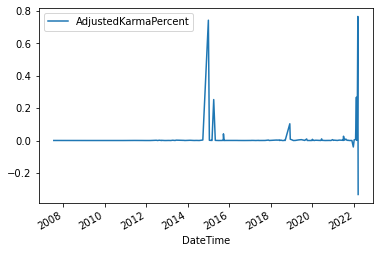

In [7]:
import matplotlib.pyplot as plt
plt.close("all")


yAxis = pd.Series(df['AdjustedKarmaPercent'])
xAxis = pd.Series(df['DateTime'])

ts = pd.Series(yAxis, index = xAxis)
ts.head()

sortdf = df.sort_values(by=['DateTime'])

sortdf.plot(x = 'DateTime', y = 'AdjustedKarmaPercent')
plt.gcf().autofmt_xdate()
plt.show()



In [8]:
from datetime import datetime, timedelta

today = datetime.now()
start_date = today - timedelta(days = 30)
end_date = today

condition = (sortdf['DateTime'] >= start_date) & (sortdf['DateTime'] <= end_date)
newAccounts = sortdf.loc[condition]
newAccounts.head(150)

,Name,TotalKarma,CommentKarma,DateTime,DateTimeComment,AdjustedKarma,AdjustedKarmaPercent
68,RichWaste6959,100,2,2022-02-23 17:40:04,1.647726e+09,98,0.020000
73,safetymole,316,2,2022-02-26 18:09:33,1.647726e+09,314,0.006329
3,namesTaken_gfsdgfdsg,1090,835,2022-03-10 06:18:36,1.647713e+09,255,0.766055
108,No_Adhesiveness_6381,-6,2,2022-03-15 23:40:33,1.647739e+09,-8,-0.333333
103,No_Adhesiveness_6381,-6,2,2022-03-15 23:40:33,1.647731e+09,-8,-0.333333


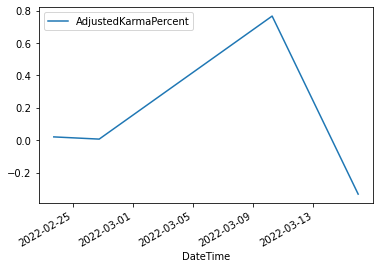

In [9]:
yAxis = pd.Series(newAccounts['AdjustedKarmaPercent'])
xAxis = pd.Series(newAccounts['DateTime'])

ts = pd.Series(yAxis, index = xAxis)
ts.head()


newAccounts.plot(x = 'DateTime', y = 'AdjustedKarmaPercent')
plt.gcf().autofmt_xdate()
plt.show()

In [10]:
response = requests.get("https://oauth.reddit.com/r/politics/hot", headers=headers)

threadList = []


for post in response.json()['data']['children']:
    x = str(post['data']['name'])
    x = x.split('_')
    threadList.append(x[1])

def getSubComments(comment, allComments, verbose=True):

    allComments.append(comment)
    if not hasattr(comment, "replies"):
        replies = comment.comments()
        if verbose: print("fetching (" + str(len(allComments)) + " comments fetched total)")
    else:
        replies = comment.replies
    for child in replies:
        getSubComments(child, allComments, verbose=verbose)    
    
    
def getAll(r, submissionId, verbose=True):
    submission = r.submission(submissionId)
    comments = submission.comments
    commentsList = []
    getSubComments(comment, commentsList, verbose=verbose)
    return commentsList
  

threadList


['tmq17g',
 'tmir0k',
 'tmibo6',
 'tm3q9y',
 'tn4fjb',
 'tmcsv9',
 'tmqzfj',
 'tm41lo',
 'tmlgwf',
 'tn66hc',
 'tmsujy',
 'tmcg4w',
 'tmzved',
 'tm3yaf',
 'tmo0rt',
 'tmup9b',
 'tme4ff',
 'tm9rm0',
 'tn5pym',
 'tmxhin',
 'tn7jj7',
 'tmg0yn',
 'tmehwy',
 'tmo44m',
 'tm41su',
 'tms7j0']

In [ ]:
#res = getAll(reddit, 'tk86b5')
#threadList = threadList[0:1]
print(threadList)

df2 = pd.DataFrame(columns = ['Name', 'TotalKarma', 'CommentKarma', 'DateTime', 'AdjustedKarma', 'AdjustedKarmaPercent'])    


today = datetime.now()
start_date = today - timedelta(days = 30)

for url in threadList:
    print('tick')
    res = reddit.submission(url)
    for comment in res.comments:
        if isinstance(comment, MoreComments):
            continue
        try:
            timestamp = comment.author.created_utc
            convertedDate = datetime.fromtimestamp(timestamp)
            if comment.author is None:
                continue
            elif comment.author.comment_karma == 0:
                continue
            #elif convertedDate <= start_date:
                #print(convertedDate)
                #continue
            else:
                df2 = df2.append({'Name' : comment.author, 'TotalKarma' : comment.author.comment_karma, 'CommentKarma' : comment.score, 
                        'DateTime' : convertedDate, 'AdjustedKarma' : -(comment.score - comment.author.comment_karma),
                        'AdjustedKarmaPercent' : comment.score / comment.author.comment_karma}, ignore_index = True)
        except AttributeError:
            print("Attribute error for " + str(comment))
            continue


        
    
df2.head(500)

['tmq17g', 'tmir0k', 'tmibo6', 'tm3q9y', 'tn4fjb', 'tmcsv9', 'tmqzfj', 'tm41lo', 'tmlgwf', 'tn66hc', 'tmsujy', 'tmcg4w', 'tmzved', 'tm3yaf', 'tmo0rt', 'tmup9b', 'tme4ff', 'tm9rm0', 'tn5pym', 'tmxhin', 'tn7jj7', 'tmg0yn', 'tmehwy', 'tmo44m', 'tm41su', 'tms7j0']
tick
Attribute error for i1yjuy1
Attribute error for i1z41xh
Attribute error for i1yk64r
tick
Attribute error for i1z30oq
tick
tick
tick
tick
tick
tick
tick
Attribute error for i1ympzu
tick
tick
tick
tick
Attribute error for i1z5v6j
tick
Attribute error for i1x9utt
tick
tick
Attribute error for i1zgtcg
tick
tick
tick
tick
tick
tick
tick
tick


In [ ]:
print(len(df2))

In [ ]:
df2.to_csv('out.csv', index = False)